# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kyle Hudson (https://github.com/cnk77)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Required imports

import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from textblob import TextBlob
from spacy.tokens import Doc
import sys
from collections import Counter


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests

url = "https://journal.code4lib.org/articles/13861"
response = requests.get(url)

with open("code4lib_article.html", "w", encoding="utf-8") as file:
    file.write(response.text)

print("HTML saved to code4lib_article.html")

HTML saved to code4lib_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Read the saved HTML file
with open("code4lib_article.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Extract article content
article_div = soup.find("div", class_="article")
if article_div:
    article_text = article_div.get_text(separator=" ", strip=True)

    blob = TextBlob(article_text)
    polarity = blob.sentiment.polarity
    sentence_count = len(blob.sentences)

    print(f"Polarity Score: {polarity:.3f}")
    print(f"Number of Sentences: {sentence_count}")
else:
    print("Could not find <div class='article'> in the HTML.")

Polarity Score: 0.203
Number of Sentences: 213


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
import spacy
from collections import Counter

# Load spaCy's English pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Normalize tokens to lowercase and filter out stop words, punctuation, and spaces
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common:
    print(f"Token: '{token}' — Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'static' — Frequency: 56
Token: 'site' — Frequency: 45
Token: 'files' — Frequency: 39
Token: 'publishing' — Frequency: 33
Token: 'html' — Frequency: 30


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [5]:
import spacy
from collections import Counter

# Load spaCy's English pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Normalize lemmas to lowercase and filter out stop words, punctuation, and spaces
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' — Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'site' — Frequency: 64
Lemma: 'file' — Frequency: 63
Lemma: 'static' — Frequency: 56
Lemma: 'publishing' — Frequency: 31
Lemma: 'html' — Frequency: 30


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

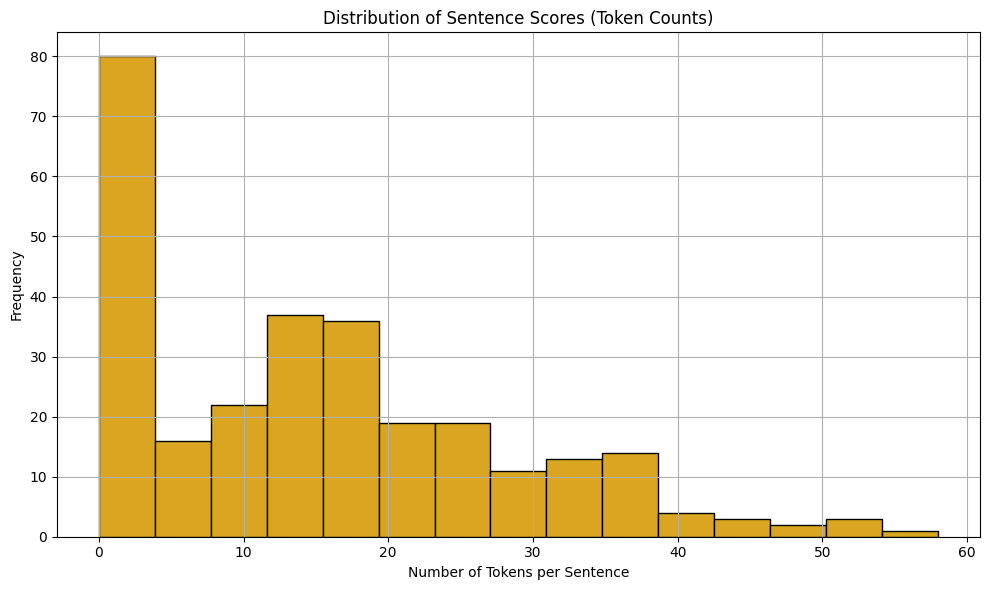

In [8]:
import matplotlib.pyplot as plt

# Score each sentence by counting its tokens (excluding punctuation and spaces)
sentence_scores = [
    len([token for token in sent if token.is_alpha])
    for sent in doc.sents
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=15, color='goldenrod', edgecolor='black')
plt.title("Distribution of Sentence Scores (Token Counts)")
plt.xlabel("Number of Tokens per Sentence")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common range of scores (based on visual inspection):
# The most common range of scores appears to be between 10 and 20 tokens per sentence.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?